In [41]:
import pandas as pd
import numpy as np
import datetime
import numpy as np
import os
import csv
import cv2
import pandas as pd
import Gaussian
import Parameters
import Util
import matplotlib.pyplot as plt
from Dependency import Dependency
from ggplot import *

In [2]:
d = Dependency()
path = os.getcwd()[:-5] + 'Model Dependencies/'
read_path = path + 'Region_Mobility_Report_CSVs/'
path_2020 = read_path + '2020_CA_Region_Mobility_Report.csv'
path_2021 = read_path + '2021_CA_Region_Mobility_Report.csv'
path_2022 = read_path + '2022_CA_Region_Mobility_Report.csv'
df1 = pd.read_csv(path_2020)
df2 = pd.read_csv(path_2021)
df3 = pd.read_csv(path_2022)

In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
print(df)

      country_region_code country_region sub_region_1 sub_region_2  \
0                      CA         Canada          NaN          NaN   
1                      CA         Canada          NaN          NaN   
2                      CA         Canada          NaN          NaN   
3                      CA         Canada          NaN          NaN   
4                      CA         Canada          NaN          NaN   
...                   ...            ...          ...          ...   
74211                  CA         Canada        Yukon          NaN   
74212                  CA         Canada        Yukon          NaN   
74213                  CA         Canada        Yukon          NaN   
74214                  CA         Canada        Yukon          NaN   
74215                  CA         Canada        Yukon          NaN   

       metro_area iso_3166_2_code  census_fips_code  \
0             NaN             NaN               NaN   
1             NaN             NaN               N

In [5]:
groups = df.groupby('iso_3166_2_code')
Ontario = groups.get_group('CA-ON')
Ontario['date'] = pd.to_datetime(Ontario['date'])
max_date = (Ontario['date'].max() - Parameters.OUTBREAK_FIRST_DAY).days
min_date = (Ontario['date'].min() - Parameters.OUTBREAK_FIRST_DAY).days
print(max_date, min_date)

1004 31


C:\Users\loveb\AppData\Local\Temp\ipykernel_33928\276772121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ontario['date'] = pd.to_datetime(Ontario['date'])


In [27]:
mobility = np.ones(shape=(6, d.total_days))
blurred_mobility = np.ones(shape=(6, d.total_days))

In [28]:
retail = Ontario['retail_and_recreation_percent_change_from_baseline'].to_numpy()
grocery = Ontario['grocery_and_pharmacy_percent_change_from_baseline'].to_numpy()
park = Ontario['parks_percent_change_from_baseline'].to_numpy()
trainsit = Ontario['transit_stations_percent_change_from_baseline'].to_numpy()
workplace = Ontario['workplaces_percent_change_from_baseline'].to_numpy()
residential = Ontario['residential_percent_change_from_baseline'].to_numpy()
mobility[0][min_date:max_date+1] = retail
mobility[1][min_date:max_date+1] = grocery
mobility[2][min_date:max_date+1] = park
mobility[3][min_date:max_date+1] = trainsit
mobility[4][min_date:max_date+1] = workplace
mobility[5][min_date:max_date+1] = residential
mobility = mobility.T

In [31]:
retail_blurred = cv2.GaussianBlur(retail.reshape(retail.shape[0], 1), (15, 15), 0)
grocery_blurred = cv2.GaussianBlur(grocery.reshape(grocery.shape[0], 1), (15, 15), 0)
park_blurred = cv2.GaussianBlur(park.reshape(park.shape[0], 1), (15, 15), 0)
trainsit_blurred = cv2.GaussianBlur(trainsit.reshape(trainsit.shape[0], 1), (15, 15), 0)
workplace_blurred = cv2.GaussianBlur(workplace.reshape(workplace.shape[0], 1), (15, 15), 0)
residential_blurred = cv2.GaussianBlur(residential.reshape(residential.shape[0], 1), (15, 15), 0)
blurred_mobility[0][min_date:max_date+1] = retail_blurred.flatten()
blurred_mobility[1][min_date:max_date+1] = grocery_blurred.flatten()
blurred_mobility[2][min_date:max_date+1] = park_blurred.flatten()
blurred_mobility[3][min_date:max_date+1] = trainsit_blurred.flatten()
blurred_mobility[4][min_date:max_date+1] = workplace_blurred.flatten()
blurred_mobility[5][min_date:max_date+1] = residential_blurred.flatten()
blurred_mobility = blurred_mobility.T

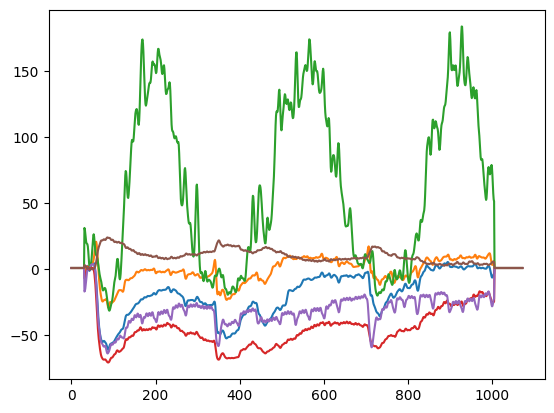

In [34]:
plt.plot(blurred_mobility)
plt.show()

In [ ]:
dates = []

In [47]:
out_df = pd.DataFrame(blurred_mobility[ (Ontario['date'].min() - Parameters.OUTBREAK_FIRST_DAY).days:(Ontario['date'].max() - Parameters.OUTBREAK_FIRST_DAY).days].astype(int), columns=['retail', 'grocery', 'park', 'trainsit', 'workplace', 'residential'])
print(out_df)

     retail  grocery  park  trainsit  workplace  residential
0         0       -1    31        -6        -16            3
1         0       -1    30        -6        -16            3
2         0       -1    27        -5        -14            2
3         0        0    23        -4        -11            2
4         0        0    20        -3         -8            1
..      ...      ...   ...       ...        ...          ...
968      -6        3    76       -25        -27            5
969      -6        3    71       -25        -27            5
970      -5        4    63       -25        -26            5
971      -4        5    57       -25        -24            5
972      -3        5    52       -24        -22            5

[973 rows x 6 columns]


In [48]:
out_df['date'] =  [Ontario['date'].min()+ datetime.timedelta(days=j) for j in range((Ontario['date'].max()  - Ontario['date'].min()).days)]
out_df.to_csv(os.getcwd()[:-5] + 'Model Dependencies/' + 'blurred_average_mobility.csv')